<a href="https://colab.research.google.com/github/peterdelaguila/peterdelaguila.github.io/blob/master/inversion_social_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/LOTE 1AB Inversion social  2000-2012_Completo_ok.xlsx')
df.head()

,GLANI,GLAID01,GLMCU,LOTE,CTA,SUBCTA,SUBLIBRO,COMUNIDAD,GLSBLT,GLDCT,...,GLAN801,GLEXA,GLEXR,GLPO,GLVINV,GLTORG,GLUSER,GLCO,GLUPMJ,GLUPMT
0,331.6793.03,Transporte,331,LOTE 1AB,6793,3.0,CPAND001,NaN,C,SO,...,** NOT FOUND **,DONACION CCNN DE TINTIYACU,"FUEL,GASOLINE,84 OCTANES",NaN,NaN,RRENGI,MMARIN,300,01/02/02,200929
1,331.6793.03,Transporte,331,LOTE 1AB,6793,3.0,CPAND001,NaN,C,SO,...,** NOT FOUND **,DONACION PNP ANDOAS,"FUEL,GASOLINE,84 OCTANES",NaN,NaN,RRENGI,MMARIN,300,01/02/02,200929
2,331.6793.03,Transporte,331,LOTE 1AB,6793,3.0,CPAND001,NaN,C,SO,...,** NOT FOUND **,DONACION PNP NUEVO ANDOAS,"FUEL,GASOLINE,84 OCTANES",NaN,NaN,RRENGI,MMARIN,300,01/02/02,200929
3,"331,6793,02",Salud,331,LOTE 1AB,6793,2.0,CPAND001,NaN,C,PV,...,INSTITUTO NACIONAL DE SALUD DE,INSTITUTO DE SALUD DEL NIÑO,HOSP.R.N.SALAS CHIMBORAZO,NaN,001-007164,JSOLIS,RKAWAN,300,31/01/02,222722
4,"331,6793,03",Transporte,331,LOTE 1AB,6793,3.0,CPAND001,NaN,C,PV,...,CAJA CHICA,CAJA CHICA,TRANS.APOYO MUNICIP.,NaN,REP.FDO.FIJO R.TUESTA,HGUERR,RKAWAN,300,31/01/02,115909


In [11]:
%matplotlib inline
import plotnine as p9
df = df.dropna()

In [12]:
yearly_sums = df.groupby(['AÑO', 'COMUNIDAD'])['MONTO'].sum()
yearly_sums.head()

AÑO  COMUNIDAD
6    Com_01        681.81
     Com_02       1858.26
     Com_03        814.37
     Com_04        799.36
     Com_05       2635.32
Name: MONTO, dtype: float64

In [13]:
yearly_sums = yearly_sums.reset_index(name='sums')
yearly_sums.head()

,AÑO,COMUNIDAD,sums
0,6,Com_01,681.81
1,6,Com_02,1858.26
2,6,Com_03,814.37
3,6,Com_04,799.36
4,6,Com_05,2635.32


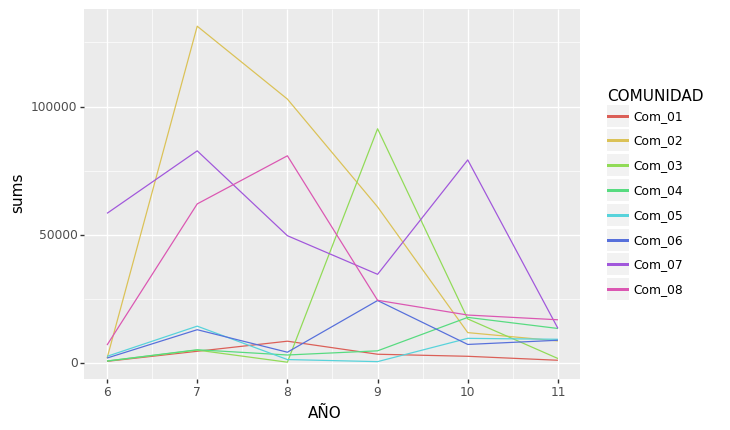

<ggplot: (8794906072933)>

In [14]:
(p9.ggplot(data=yearly_sums,
           mapping=p9.aes(x='AÑO',
                          y='sums',
                          color='COMUNIDAD'))
    + p9.geom_line()
)